Example of using ptm_pred to prototype phosphorylation classifiers 


Histadine Phosphorylation is a quick place to start, not much data though. However, that means the code runs much faster.

Predictor is the class which handles reading the data, sequence vector is a function which vectorizes a protien sequence into a feature array representing amino acids as integer values between 0-20. 0 represents empty space to average out vector length. It can also include hydrophobicity as a feature.  


In [1]:
from pred import Predictor
from pred import sequence_vector

Next we are going to load our data and generate random negative data aka gibberish data. The clean data files has negatives created from the data sets pulled from phosphoELM and dbptm. 

In generate_random_data the amino acid parameter represents the amino acid being modified aka the target amino acid modification, the float being passed through is multiplier. For example we use .5 here, that means that .5 * number of data points = random negatives generated.

In [2]:
y = Predictor()
y.load_data(file="Data/Training/clean_Y.csv")

Loading Data
Loaded Data


Next we vectorize the sequences, we are going to use the sequence vector. 
Now we can apply a data balancing function, here we are using adasyn which generates synthetic examples of the minority (in this case positive) class. By setting random data to 1 

In [3]:
y.process_data(vector_function="sequence", amino_acid="Y", imbalance_function="ADASYN", random_data=1)

Working on Data
Balancing Data
Balanced Data
Finished working with Data


Now we can apply a data balancing function, here we are using adasyn which generates synthetic examples of the minority (in this case positive) class. 

The array outputed contains the precision, recall, fscore, and total numbers correctly estimated.

In [4]:
y.supervised_training("mlp_adam")

Random Sequences Generated 12594
Filtering Random Data
Random Data Added: 12594
Finished with Random Data
Training Data Points: 34252
Test Data Points: 2407
Starting Training
Done training
Test Results
Sensitivity: 0.8191850594227504
Specificity : 0.8608624898291294
Accuracy: 0.8404653095139177
ROC 0.840023774626
TP 965 FP 171 TN 1058 FN 213



None


Next we can check against the benchmarks pulled from dbptm. 

In [5]:
y.benchmark("Data/Benchmarks/phos.csv", "Y")

Benchmark Results 
Sensitivity: 0.975609756097561
Specificity : 0.8887471293697372
Accuracy: 0.8888983230736573
ROC 0.932178442734
TP 40 FP 2616 TN 20898 FN 1



None


Want to explore the data some more, easily generate PCA and TSNE diagrams of the training set.

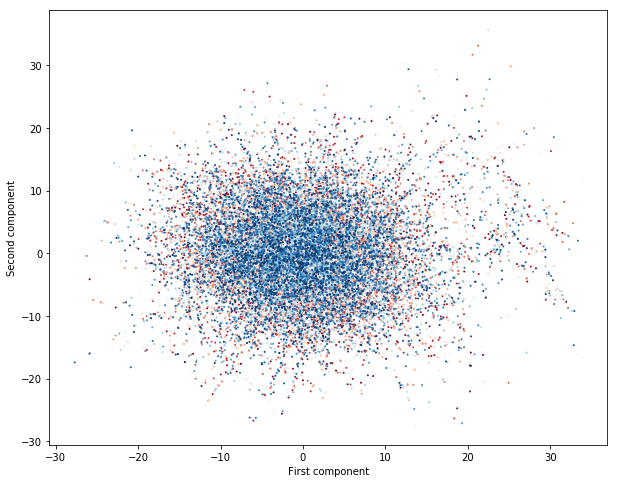

In [6]:
y.generate_pca()

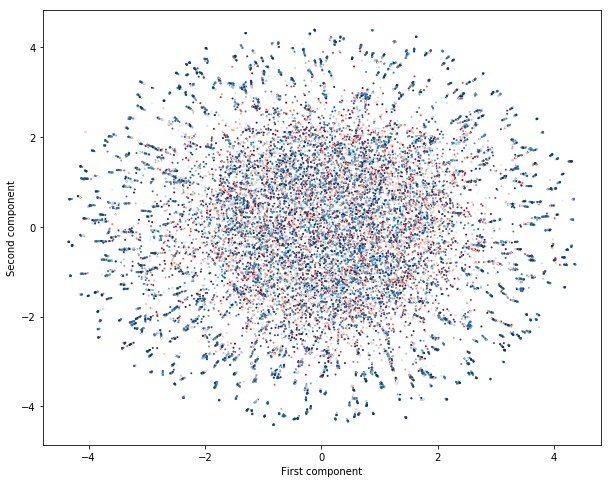

In [7]:
y.generate_tsne()

There you have it, you have prototype a Tyrosine phosphorylation classifier. 